<div style="font-size: 18px"><b>1.1.1 Пример</b></div>
<br><i>Рассмотрим программу обучения персептрона на языке Python. Сначала рассмотрим основной класс персептрона, который умеет учиться по тестовым данным.</i>

In [6]:
class Perceptron:
    def __init__(self, N):
        self.w = list()
        for i in range(N):
            self.w.append( 0)

    def calc(self, x):
        res = 0
        for i in range(len(self.w)):
            res = res + self.w[i] * x[i]
        return res
    def sign(self, x):
        if self.calc(x) > 0:
            return 1
        else:
            return -1

    def learn(self, la, x, y):
        if y * self.calc(x) <= 0:
            for i in range(len(self.w)):
                self.w[i] = self.w[i] + la * y * x[i]

    def learning(self, la, T):
        for n in range(100):
            for t in T:
                self.learn(la, t[ 0], t[1])

perceptron = Perceptron(2)
la = 0.1

T = list()
T.append([[2, 1], 1])
T.append([[3, 2], 1])
T.append([[4, 1], 1])
T.append([[1, 2], -1])
T.append([[2, 3], -1])
T.append([[5, 7], -1])

perceptron.learning(la, T)
print(perceptron.w)

print(perceptron.sign([1.5, 2]))
print(perceptron.sign([3, 1.5]))
print(perceptron.sign([5, 1]))
print(perceptron.sign([5, 10]))

[0.1, -0.1]
-1
1
1
-1


<div style="font-size: 18px"><b>1.1.2 Пример</b></div>

In [10]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2, 3])
print(n.feedforward(x))

0.9990889488055994


In [11]:
import numpy as np
class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
    
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))

0.7216325609518421


<div style="font-size: 18px"><b>Пример</b></div>

In [16]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        self.weights1 += d_weights1
        self.weights2 += d_weights2

<div style="font-size: 18px"><b>Задание</b></div>
<br><i>Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.
<br><b>Данные нейросети:</b>
<br>− три входа (x1, x2, x3);
<br>− три нейрона в скрытых слоях (h1, h2, h3);
<br>− выход (o1).
<br><b>Нейроны имеют идентичные веса и пороги:</b>
<br>− w = [0.5, 0.5, 0.5]
<br>− b = 0
<br><b>Данные нейросети:</b>
<br>− два входа (x1, x2);
<br>− два нейрона в скрытых слоях (h1, h2);
<br>− два выхода (o1, o2).
<br><b>Нейроны имеют идентичные веса и пороги:</b>
<br>− w = [1, 0];
<br>− b = 1.</i>

In [19]:
import numpy as np
class FirstNeuralNetwork:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
    
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        
        self.o1 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1


class SecondNeuralNetwork:
    def __init__(self):
        weights = np.array([1, 0])
        bias = 1
    
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)

        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)

        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2

network = FirstNeuralNetwork()
x = np.array([1, 2, 3])
print(network.feedforward(x))


network = SecondNeuralNetwork()
x1 = np.array([1, 2])
print(network.feedforward(x1))

0.8067238139969796
(0.8677026536525567, 0.8677026536525567)


<div style="font-size: 18px"><b>Задание</b></div>
<br><i>Реализуйте классы нейронных сетей с использованием других функций активации</i>
<img src="f.png" alt="Alternative text" width="230"/> 

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)
x = np.array([4, 5])
print(n.feedforward(x))

0.9998766054240137


In [27]:
def tanh(x):
    return np.tanh(x)
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)

weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2, 3])
print(n.feedforward(x))

0.9999983369439447


In [37]:
def ReLU(x):
    return max(0, x)
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return ReLU(total)

weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)
x = np.array([1, 2])
print(n.feedforward(x))

6


<div style="font-size: 18px"><b>Пример</b></div>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

from sklearn.datasets import load_digits
digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
print("Dataset Sizes: ", X_digits.shape, Y_digits.shape)

Dataset Sizes:  (1797, 64) (1797,)


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits,
        train_size=0.80, test_size=0.20, stratify=Y_digits, random_state=123)
print('Train/Test Sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes:  (1437, 64) (360, 64) (1437,) (360,)


In [49]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])

print('Test Accuracy : %.3f'%mlp_classifier.score(X_test, Y_test))
print('Training Accuracy : %.3f'%mlp_classifier.score(X_train, Y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy : 0.983
Training Accuracy : 1.000


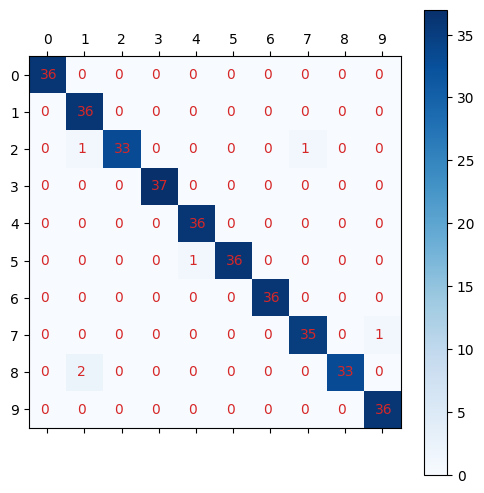

In [51]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)

    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(10), range(10))
    plt.xticks(range(10), range(10))

    plt.colorbar();
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2, j+0.1, str(conf_mat[j, i]), color='tab:red')
plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

In [52]:
print("Loss: ", mlp_classifier.loss_)
print("Number of Coefs: ", len(mlp_classifier.coefs_))
print("Number of Intercepts: ", len(mlp_classifier.intercepts_))
print("Number of Iterations for Which Estimator Ran: ", mlp_classifier.n_iter_)
print("Name of Output Layer Activation Function: ", mlp_classifier.out_activation_)

Loss:  0.0034728684994180603
Number of Coefs:  2
Number of Intercepts:  2
Number of Iterations for Which Estimator Ran:  125
Name of Output Layer Activation Function:  softmax


<div style="font-size: 18px"><b>Пример</b></div>

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=0.80, test_size=0.20, random_state=123)
print("Train/Test Sizes: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes:  (1437, 64) (360, 64) (1437,) (360,)


In [56]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)

Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])

print('Test R^2 Score: %.3f'%mlp_regressor.score(X_test, Y_test))
print('Training R^2 Score: %.3f'%mlp_regressor.score(X_train, Y_train))

[3.42060853 4.53357389 5.11138414 2.52091185 1.69924804 4.3939812
 0.29689434 0.75905644 7.45193334 3.2841093 ]
[3 3 4 4 1 3 1 0 7 4]
Test R^2 Score: 0.858
Training R^2 Score: 0.964


In [62]:
print("Loss: ", mlp_regressor.loss_)
print("Number of Coefs: ", len(mlp_regressor.coefs_))
print("Number of Intercepts: ", len(mlp_regressor.intercepts_))
print("Number of Iterations for Which Estimator Ran: ", mlp_regressor.n_iter_)
print("Name of Output Layer Activation Function: ", mlp_regressor.out_activation_)

Loss:  0.13101948536886002
Number of Coefs:  2
Number of Intercepts:  2
Number of Iterations for Which Estimator Ran:  149
Name of Output Layer Activation Function:  identity


<div style="font-size: 18px"><b>Задание</b></div>
<br><i>Используйте классы MLPClassified и MLPRegressor для классификации и регрессии произвольных данных из интернета. Проведите анализ атрибуты, полученных моделей.</i>
<div style="font-size: 16px"><br><b>
    
[Ирисы](https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv)</b></div>

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

iris_url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
iris_data = pd.read_csv(iris_url)

X = iris_data.iloc[:, :-1].values
Y = iris_data.iloc[:, -1].values
print("Dataset Sizes: ", X.shape, Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, stratify=Y, random_state=123)
print('Train/Test Sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Dataset Sizes:  (150, 4) (150,)
Train/Test Sizes:  (120, 4) (30, 4) (120,) (30,)


In [118]:
mlp_classifier = MLPClassifier(max_iter=2000, random_state=123)
mlp_classifier.fit(X_train, Y_train)
Y_preds = mlp_classifier.predict(X_test)


print(Y_preds[:10])
print(Y_test[:10])
print('Test Accuracy : %.3f'%mlp_classifier.score(X_test, Y_test))
print('Training Accuracy : %.3f'%mlp_classifier.score(X_train, Y_train))

print("Loss: ", mlp_classifier.loss_)
print("Number of Coefs: ", len(mlp_classifier.coefs_))
print("Number of Intercepts: ", len(mlp_classifier.intercepts_))
print("Number of Iterations for Which Estimator Ran: ", mlp_classifier.n_iter_)
print("Name of Output Layer Activation Function: ", mlp_classifier.out_activation_)

['Versicolor' 'Setosa' 'Virginica' 'Virginica' 'Setosa' 'Setosa'
 'Virginica' 'Virginica' 'Virginica' 'Setosa']
['Versicolor' 'Setosa' 'Virginica' 'Virginica' 'Setosa' 'Setosa'
 'Virginica' 'Versicolor' 'Virginica' 'Setosa']
Test Accuracy : 0.933
Training Accuracy : 0.992
Loss:  0.06237838693566958
Number of Coefs:  2
Number of Intercepts:  2
Number of Iterations for Which Estimator Ran:  641
Name of Output Layer Activation Function:  softmax


<div style="font-size: 16px"><br><b>
    
[Зарплата](https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv)</b></div>

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
data = pd.read_csv(url)
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [120]:
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values
print("Dataset Sizes: ", X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print('Train/Test Sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Dataset Sizes:  (30, 1) (30,)
Train/Test Sizes:  (24, 1) (6, 1) (120,) (30,)


In [121]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=9000, random_state=123)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print(y_pred[:10])
print(y_pred[:10])

print("Loss: ", model.loss_)
print("Number of Coefs: ", len(model.coefs_))
print("Number of Intercepts: ", len(model.intercepts_))
print("Number of Iterations for Which Estimator Ran: ", model.n_iter_)
print("Name of Output Layer Activation Function: ", model.out_activation_)

[ 55265.22271592 126547.25055993  52335.82431138 116782.58921143
  55265.22271592 117759.05534628]
[ 55265.22271592 126547.25055993  52335.82431138 116782.58921143
  55265.22271592 117759.05534628]
Loss:  16873681.657113172
Number of Coefs:  3
Number of Intercepts:  3
Number of Iterations for Which Estimator Ran:  8139
Name of Output Layer Activation Function:  identity
